In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
sb.set()

In [3]:
dataset = pd.read_csv('dados_func.csv')

In [4]:
dataset.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
nivel_satisfacao         14999 non-null float64
ultima_avaliacao         14999 non-null float64
numero_projetos          14999 non-null int64
horas_medias_por_mes     14999 non-null int64
tempo_empresa            14999 non-null int64
acidente_trabalho        14999 non-null int64
deixou_empresa           14999 non-null int64
ultima_promocao_5anos    14999 non-null int64
area                     14999 non-null object
salario                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
np.unique(dataset.area)

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

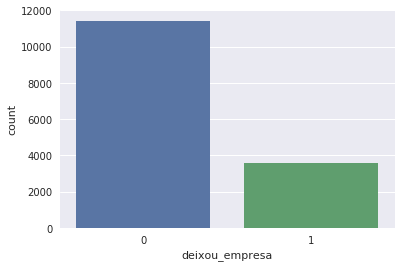

In [9]:
sb.countplot(dataset.deixou_empresa)

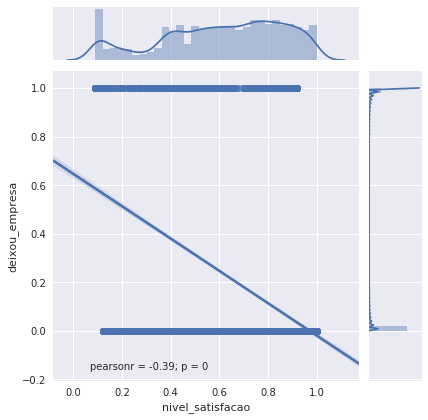

In [11]:
sb.jointplot(x='nivel_satisfacao', y='deixou_empresa', data=dataset, kind='reg')

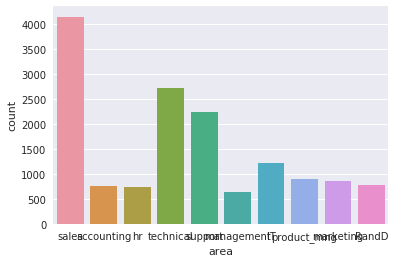

In [12]:
sb.countplot(x='area', data=dataset)

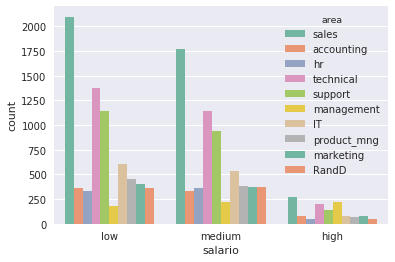

In [13]:
sb.countplot(x='salario', hue='area', data=dataset, palette='Set2')

In [14]:
dataset.salario = dataset.salario.astype('category').cat.reorder_categories(['low','medium','high'])

In [15]:
salario_numeric = pd.DataFrame(dataset.salario.cat.codes)

In [17]:
salario_numeric.columns = ['salario']

In [19]:
dataset= dataset.drop(['salario'], 1).join(salario_numeric)

In [20]:
dataset.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


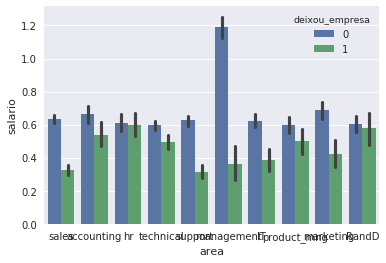

In [21]:
sb.barplot(x='area', y='salario', hue='deixou_empresa', data=dataset)

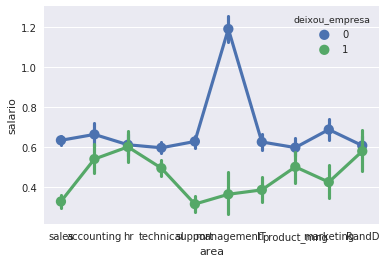

In [22]:
sb.pointplot(x='area', y='salario', hue='deixou_empresa', data=dataset)

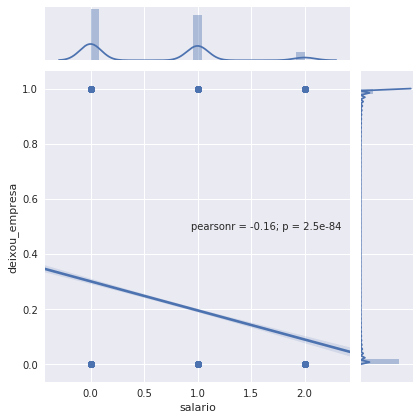

In [23]:
sb.jointplot(x='salario', y='deixou_empresa', data=dataset, kind='reg')

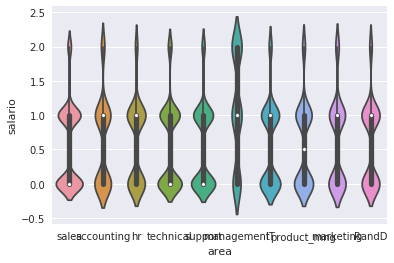

In [24]:
sb.violinplot(x='area', y='salario', data=dataset, inner='box')

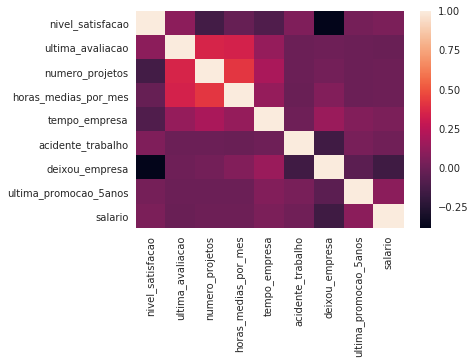

In [25]:
sb.heatmap(dataset.corr())

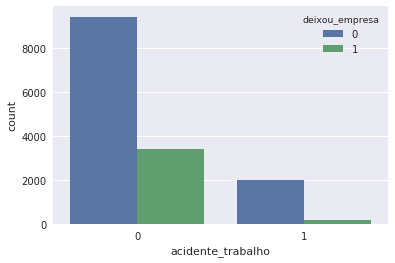

In [26]:
sb.countplot(x='acidente_trabalho', hue='deixou_empresa', data=dataset)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [28]:
forest = RandomForestClassifier(1000)

In [29]:
sales_dummies = pd.get_dummies(dataset.area)

In [30]:
dataset = dataset.drop(['area'], 1).join(sales_dummies)

In [64]:
X = dataset.drop(['deixou_empresa'], 1)
y = dataset.deixou_empresa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=6)

In [37]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
print(f"Model accu: {forest.score(X_test, y_test) * 100.}%")

Model accu: 98.95555555555555%


In [39]:
importante = forest.feature_importances_

In [42]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [43]:
indices = np.argsort(importante)[::-1]

In [44]:
print("Features ranking:")

Features ranking:


In [47]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)"% (f + 1, indices[f], importante[indices[f]]))

1. feature 0 (0.319415)
2. feature 4 (0.187316)
3. feature 2 (0.174167)
4. feature 3 (0.150597)
5. feature 1 (0.124280)
6. feature 7 (0.012740)
7. feature 5 (0.009676)
8. feature 17 (0.003623)
9. feature 15 (0.003166)
10. feature 16 (0.002892)
11. feature 6 (0.002070)
12. feature 11 (0.001825)
13. feature 8 (0.001667)
14. feature 9 (0.001531)
15. feature 12 (0.001388)
16. feature 10 (0.001296)
17. feature 13 (0.001250)
18. feature 14 (0.001101)


In [61]:
importances_df = pd.DataFrame(importante)
importances_df.columns=['importantes']
columns_df = pd.DataFrame(dataset.drop('deixou_empresa', 1).columns.tolist())
columns_df.columns=['name']

In [62]:
importances_df = importances_df.join(columns_df)

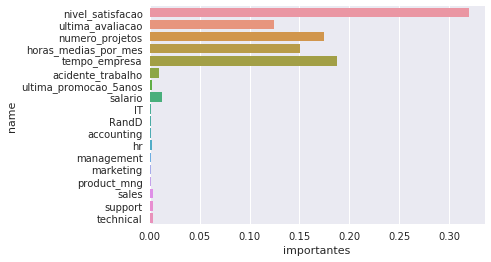

In [63]:
sb.barplot(x='importantes', y='name', data= importances_df )